In [1]:
'''Required libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
import itertools
from script.utility import preprocess_project_data, stock_selection
from script.BaseStrategy import BenchmarkStrategy
from script.Portfolio import simulate_portfolio_over_period, generate_trade_documentation_table

# 1.Data Loading & Preprocessing

In [2]:
def load_data(filepath: str) -> pd.DataFrame:
    data = pd.read_csv(filepath, parse_dates=True, index_col=0)
    return data

In [3]:
full_df, train_df, test_df = preprocess_project_data("data/Trading_Project_Data_Cleaned.csv")

Data loaded and sorted by date.
Data split into 28 training rows and 221 testing rows.


In [4]:
test_df.head()

,Close_AAPL,Close_AMZN,Close_BA,Close_CAT,Close_CVX,Close_GOOGL,Close_GS,Close_JNJ,Close_JPM,Close_KO,...,Adj_Return_XOM,SMA_short_XOM,SMA_long_XOM,Volatility_XOM,RSI_XOM,EMA_XOM,BOLL_upper_XOM,BOLL_lower_XOM,MACD_line_XOM,MACD_signal_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-03-01,179.012268,178.220001,200.000000,331.704254,148.097229,136.644638,381.606262,158.338089,181.148910,57.765736,...,0.012550,101.460169,100.353412,0.005388,72.681418,102.018202,103.288993,100.711920,1.473991,1.436509
2024-03-04,174.468719,177.580002,200.539993,333.625275,144.288452,132.868347,385.686829,156.111267,182.507858,58.037441,...,-0.014082,101.746464,100.443534,0.009637,66.146848,101.977515,103.217351,100.672018,1.396503,1.428508
2024-03-05,169.506653,174.119995,201.139999,328.581268,144.976547,132.190796,384.369232,156.238251,184.336060,57.756035,...,0.012191,101.901811,100.578598,0.010824,60.279914,102.259320,103.604727,100.786587,1.419537,1.426714
2024-03-06,168.510254,173.509995,201.000000,330.650147,143.755402,130.925369,383.051666,155.622940,185.294174,57.785149,...,0.010640,102.149064,100.691247,0.011330,64.587356,102.746393,104.540621,100.553413,1.509385,1.443248
2024-03-07,168.390686,176.820007,203.029999,335.171997,144.763321,133.894623,381.930725,155.163895,183.671265,57.678410,...,0.005604,102.524825,100.906228,0.011228,73.008024,103.258098,105.387791,100.637626,1.609292,1.476457


In [5]:
train_df.head()

,Close_AAPL,Close_AMZN,Close_BA,Close_CAT,Close_CVX,Close_GOOGL,Close_GS,Close_JNJ,Close_JPM,Close_KO,...,Adj_Return_XOM,SMA_short_XOM,SMA_long_XOM,Volatility_XOM,RSI_XOM,EMA_XOM,BOLL_upper_XOM,BOLL_lower_XOM,MACD_line_XOM,MACD_signal_XOM
Price_Ticker,,,,,,,,,,,,,,,,,,,,,
2024-01-22,192.944748,154.779999,214.929993,284.386902,136.604904,145.462692,376.831573,157.484207,166.308197,57.804554,...,NaN,93.626274,93.626274,NaN,100.0,93.626274,NaN,NaN,0.000000,0.000000
2024-01-23,194.228455,156.020004,211.500000,284.544495,136.221420,146.508896,371.764343,154.905838,165.213226,58.076252,...,0.011195,94.153301,94.153301,NaN,100.0,93.889788,95.643959,92.662643,0.084084,0.016817
2024-01-24,193.551773,156.869995,214.130005,286.367065,138.934540,148.162903,370.426758,154.081940,166.689453,57.164120,...,0.017113,94.873726,94.873726,0.004185,100.0,94.495985,97.582816,92.164636,0.279371,0.069328
2024-01-25,193.223389,157.750000,201.880005,296.307312,142.433807,151.321442,373.648712,154.663498,169.074951,57.406708,...,0.025084,95.845573,95.845573,0.006970,100.0,95.562267,100.318222,91.372925,0.624355,0.180333
2024-01-26,191.481918,159.119995,205.470001,294.987213,142.980240,151.640289,368.854858,154.605347,168.429688,57.610481,...,0.008483,96.596944,96.596944,0.007354,100.0,96.572307,101.724768,91.469119,0.954640,0.335195


# 2. Stock Selection

In [6]:
top10_tickers = stock_selection(train_df)

Ranking by Volatility (higher is better):

Ranking by Average Correlation (lower is better):

Ranking by Average Return (higher is better):

Composite Ranking (lower is better):

Top 10 Selected Tickers:


# 3. Strategies

In [7]:
from script.technical_indicator import EMAStrategy, BollStrategy, MACDStrategy, RSIStrategy, SMAStrategy

# Stock NVD as example for technical indicators

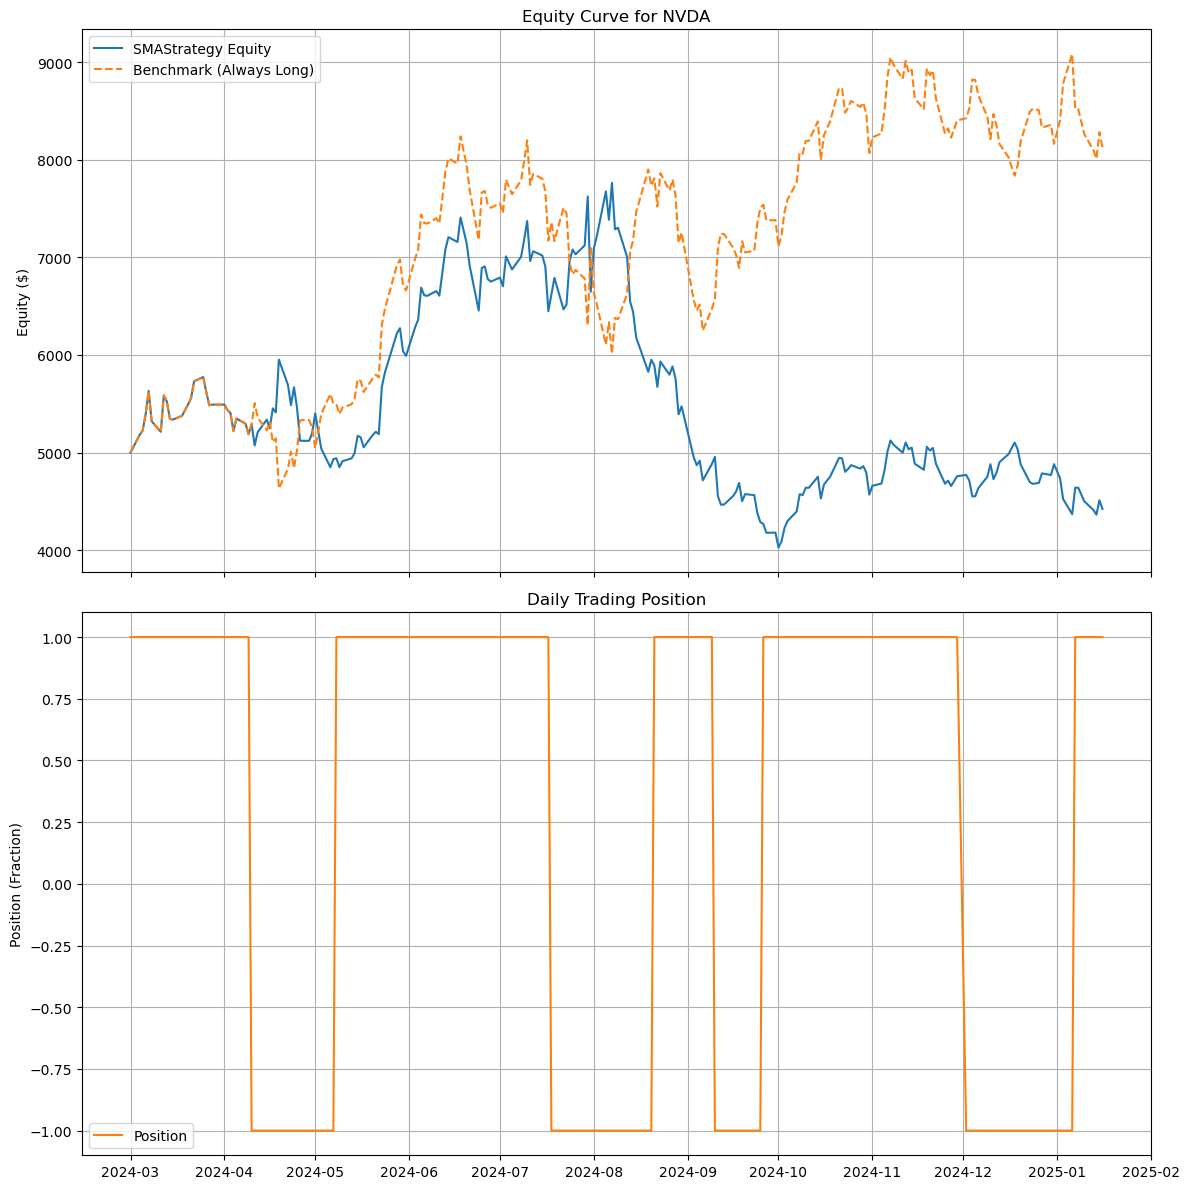

In [8]:
sma_strategy_example = SMAStrategy(ticker="NVDA", initial_investment=5000)
results_sma = sma_strategy_example.simulate(test_df)
sma_strategy_example.plot_results(test_df)

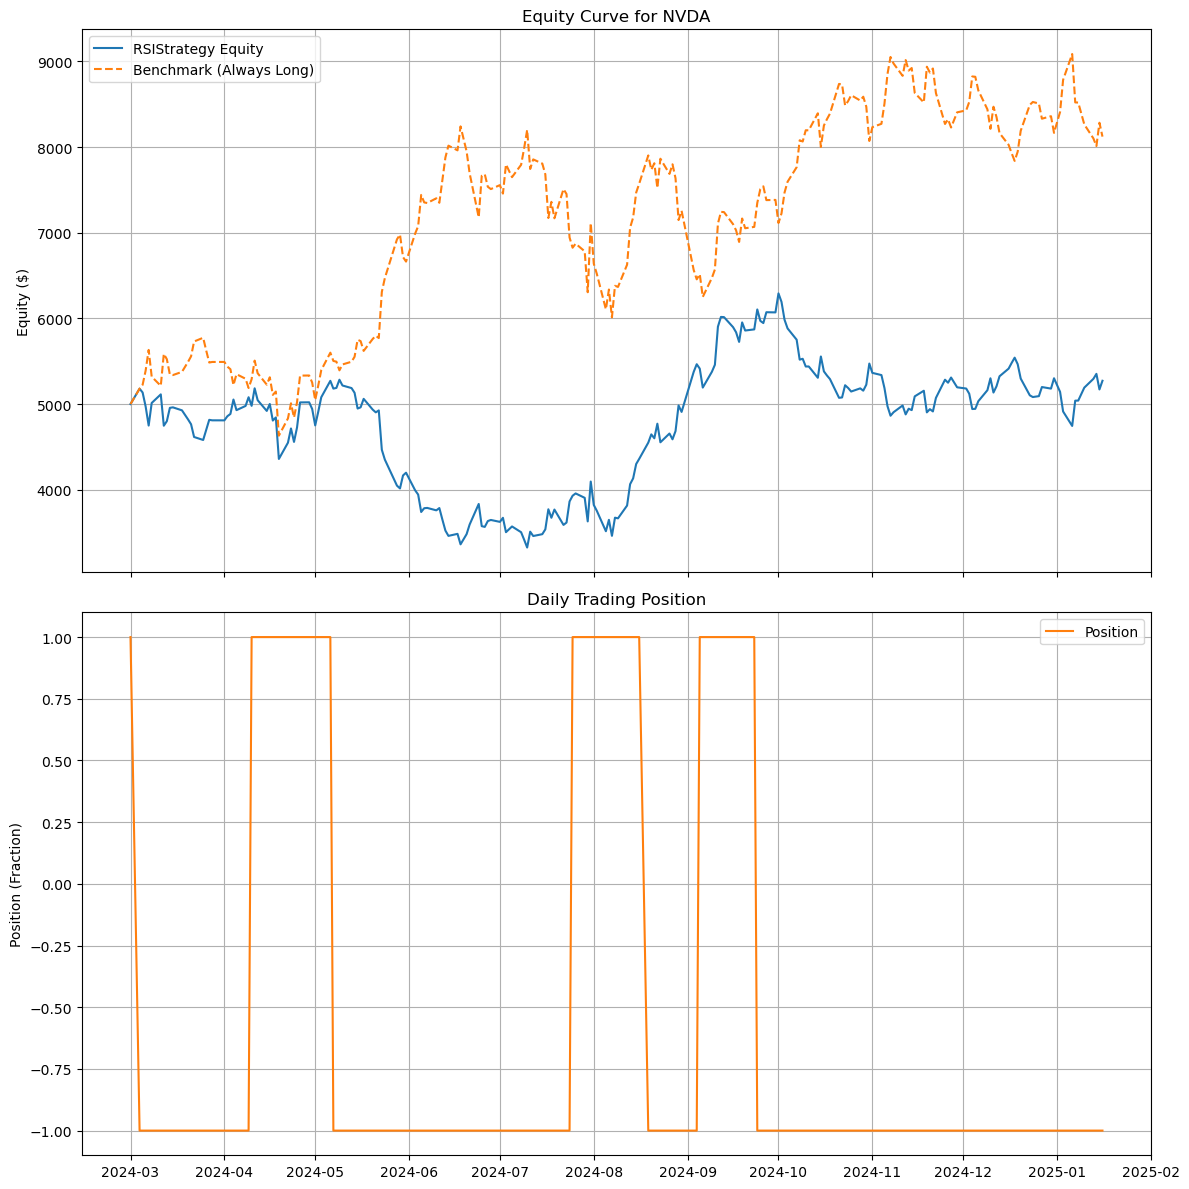

In [9]:
RSI_strategy_example = RSIStrategy(ticker="NVDA", initial_investment=5000)
results_RSI = RSI_strategy_example.simulate(test_df)
RSI_strategy_example.plot_results(test_df)

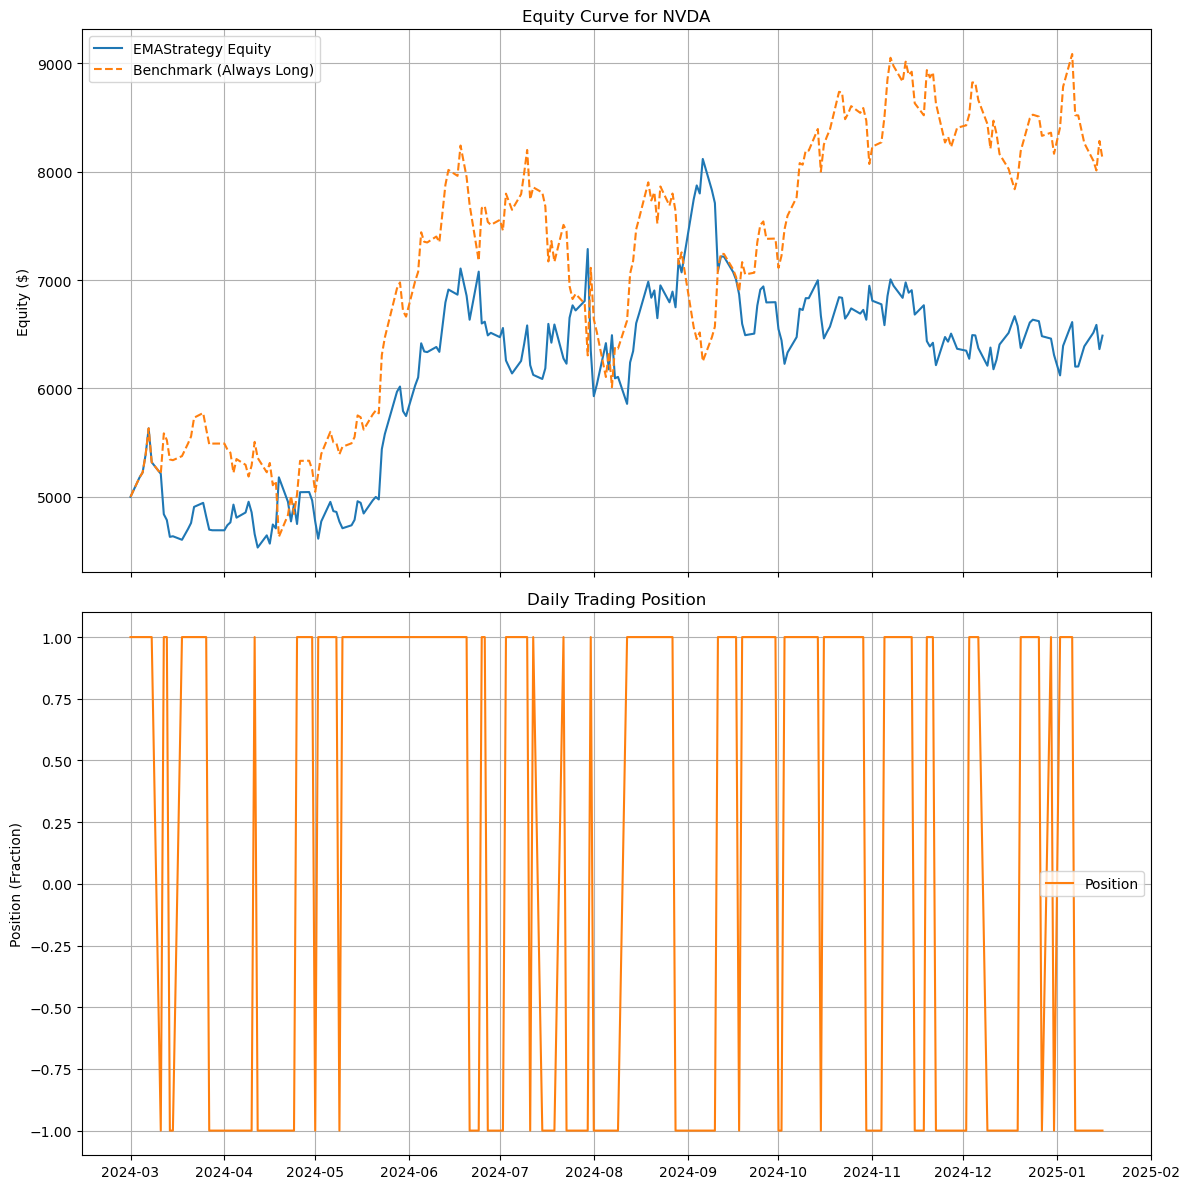

In [10]:
EMA_strategy_example = EMAStrategy(ticker="NVDA", initial_investment=5000)
results_EMA = EMA_strategy_example.simulate(test_df)
EMA_strategy_example.plot_results(test_df)

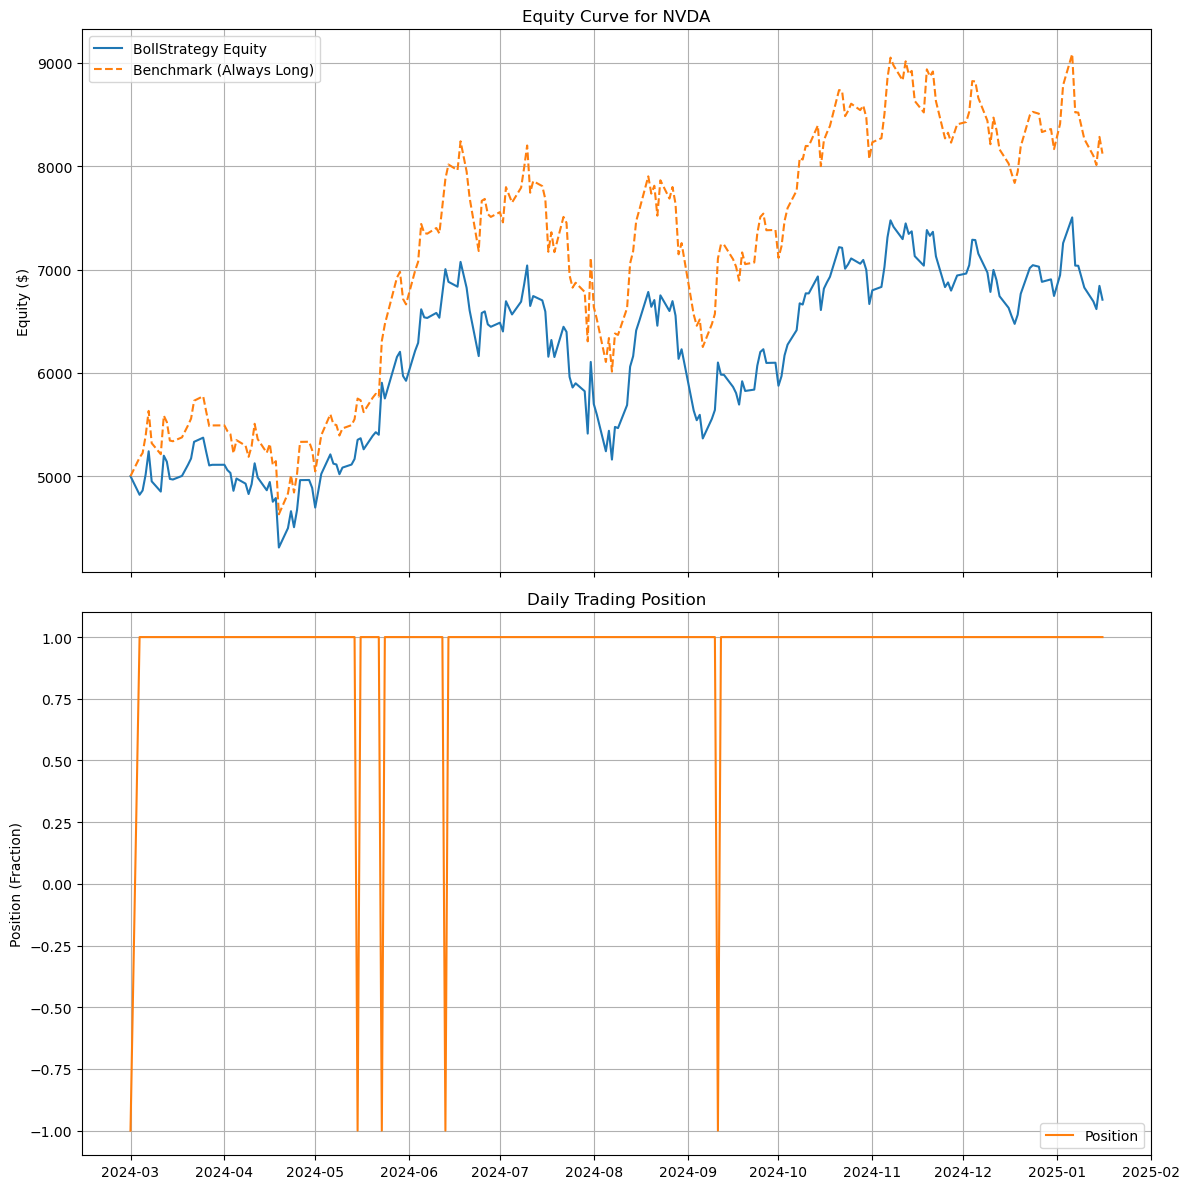

In [11]:
Boll_strategy_example = BollStrategy(ticker="NVDA", initial_investment=5000)
results_Boll = Boll_strategy_example.simulate(test_df)
Boll_strategy_example.plot_results(test_df)

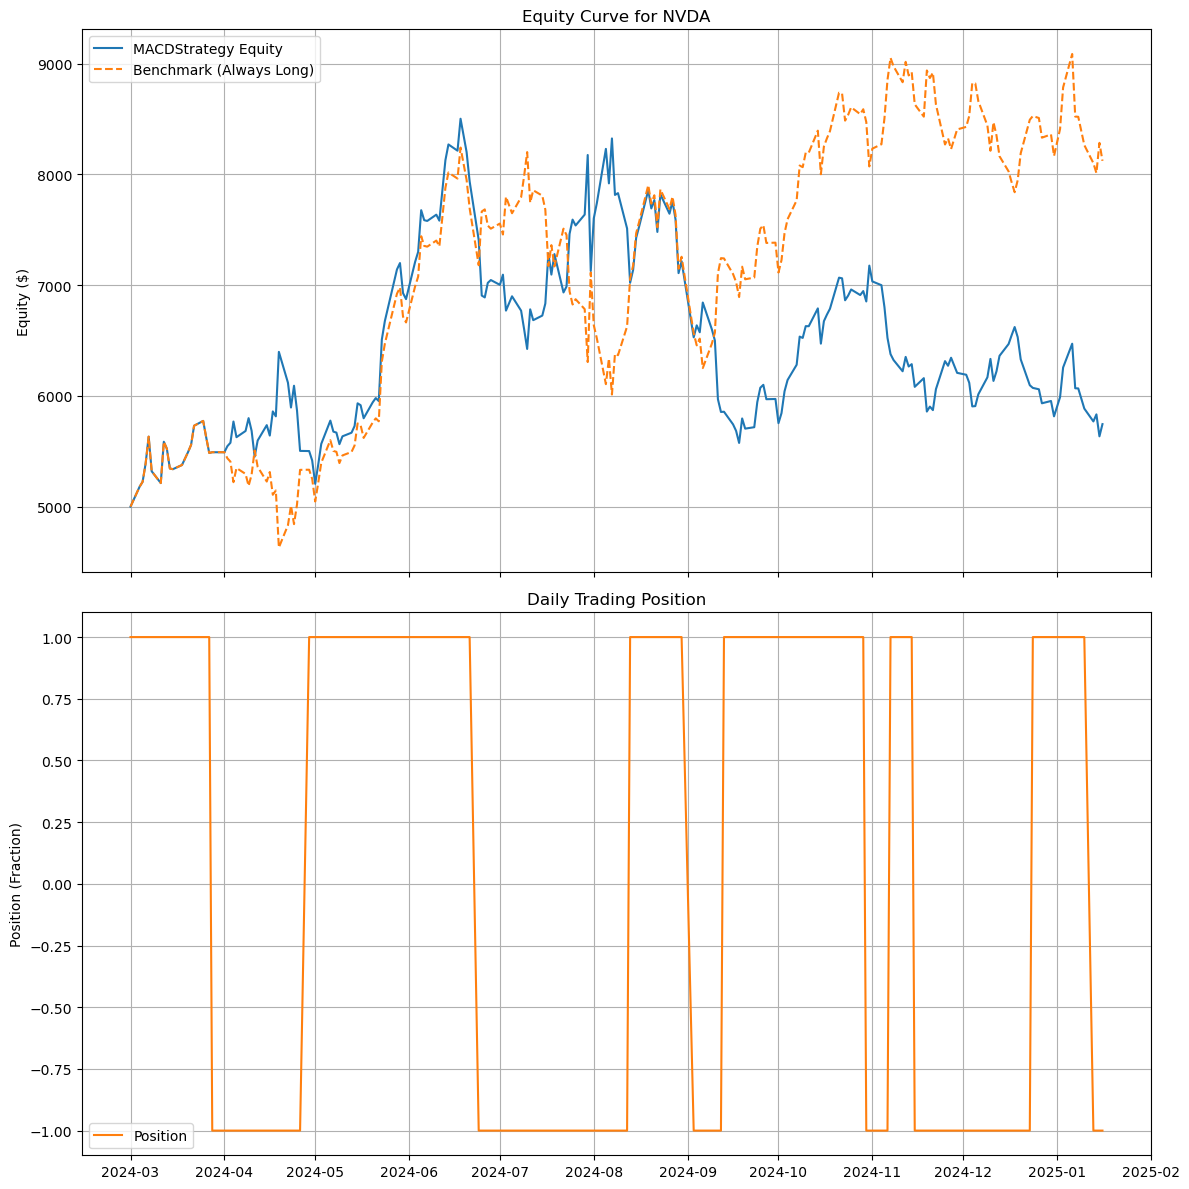

In [12]:
MACD_strategy_example = MACDStrategy(ticker="NVDA", initial_investment=5000)
results_MACD = MACD_strategy_example.simulate(test_df)
MACD_strategy_example.plot_results(test_df)

# 4. Stock Analysis

In [13]:
def compute_strategy_weights(ticker, data, initial_investment=5000):
    """
    Computes strategy weights from the combined data.

    For the six strategies (SMA, RSI, EMA, Boll, MACD, Benchmark),
    this function simulates each on the provided data, computes the cumulative
    log return (i.e. ln(final equity/initial investment)) for each, and then:
      - Sets a raw value of zero for strategies with negative log returns.
      - Computes raw proportions.
      - Assigns the Benchmark a final weight of 0.33 + (p_benchmark * 0.66) and
        all others a weight of p_i * 0.66.
    Finally, the weights are normalized (if necessary) so they sum to 1.

    Returns:
        dict: Final weights for strategies.
    """
    # Instantiate individual strategy objects.
    strat_objs = {
        "SMA": SMAStrategy(ticker=ticker, initial_investment=initial_investment, sma_short_window=7, sma_long_window=25),
        "RSI": RSIStrategy(ticker=ticker, initial_investment=initial_investment),
        "EMA": EMAStrategy(ticker=ticker, initial_investment=initial_investment),
        "BOLL": BollStrategy(ticker=ticker, initial_investment=initial_investment),
        "MACD": MACDStrategy(ticker=ticker, initial_investment=initial_investment),
        "Benchmark": BenchmarkStrategy(ticker=ticker, initial_investment=initial_investment)
    }

    cum_log_returns = {}
    # Simulate each strategy on the updated combined data.
    for name, obj in strat_objs.items():
        result = obj.simulate(data)
        final_equity = result["Equity"].iloc[-1]
        r = np.log(final_equity / initial_investment)
        cum_log_returns[name] = r if r > 0 else 0  # assign zero if negative.
        # print(f"{name} cumulative log return: {r:.4f}")

    total_raw = sum(cum_log_returns.values())
    if total_raw > 0:
        raw_props = {name: cum_log_returns[name] / total_raw for name in cum_log_returns}
    else:
        raw_props = {name: 1/len(cum_log_returns) for name in cum_log_returns}

    final_weights = {}
    for name in raw_props:
        if name == "Benchmark":
            final_weights[name] = 1/3 + (raw_props[name] * 2/3)
        else:
            final_weights[name] = raw_props[name] * 2/3
    total_weight = sum(final_weights.values())
    final_weights = {name: weight/total_weight for name, weight in final_weights.items()}

    # print("Updated weights:", final_weights)
    return final_weights

In [14]:
def dynamic_mixed_strategy(ticker, train_df, test_df, initial_investment=5000, update_interval=1):
    """
    Dynamically updates mixed strategy weights every 'update_interval' trading day(s).

    For update_interval = 1, each block consists of a single day. In each block,
    the current training data (initially train_df and then augmented by prior test blocks)
    is combined with the new day from test_df. New strategy weights are computed via
    compute_strategy_weights, then each individual strategy is simulated on the combined data.
    The results corresponding to the one-day block are extracted; from these, the weighted daily
    log return is computed and converted to an equity value, starting from the previous block's ending equity.

    Finally, the overall mixed equity time series is plotted (together with the Benchmark) and a tuple
    (simulation_df, benchmark_equity) is returned.

    Returns:
         tuple: (simulation_df, benchmark_equity)
            - simulation_df: a DataFrame indexed by date with columns “Position”, “Equity”, “SimpleReturn”.
            - benchmark_equity: benchmark's simulated equity time series.
    """
    # Ensure test_df is sorted by date.
    test_df = test_df.sort_index()
    current_train = train_df.copy()
    current_equity = initial_investment
    mixed_dates = []
    mixed_equities = []
    mixed_positions = []

    n = len(test_df)
    # Loop through test data one day at a time.
    for start in range(0, n, update_interval):
        block = test_df.iloc[start : start + update_interval]
        # Because update_interval==1, block has one day.
        updated_data = pd.concat([current_train, block]).sort_index()
        # Compute new strategy weights on the full updated data.
        new_weights = compute_strategy_weights(ticker, updated_data, initial_investment)
        # print(f"New weights for block starting {block.index[0]}: {new_weights}")

        strat_objs = {
            "SMA": SMAStrategy(ticker=ticker, initial_investment=initial_investment, sma_short_window=7, sma_long_window=25),
            "RSI": RSIStrategy(ticker=ticker, initial_investment=initial_investment),
            "EMA": EMAStrategy(ticker=ticker, initial_investment=initial_investment),
            "BOLL": BollStrategy(ticker=ticker, initial_investment=initial_investment),
            "MACD": MACDStrategy(ticker=ticker, initial_investment=initial_investment),
            "Benchmark": BenchmarkStrategy(ticker=ticker, initial_investment=initial_investment)
        }

        block_daily_log_rets = {}
        block_positions = {}
        for name, obj in strat_objs.items():
            sim_res = obj.simulate(updated_data)
            # Extract only the row corresponding to the current block day.
            block_res = sim_res.loc[block.index]
            # Compute daily log return; if only one row is present, then after .shift(1) it becomes NaN, fill with 0.
            lr = np.log(block_res["Equity"] / block_res["Equity"].shift(1)).fillna(0)
            block_daily_log_rets[name] = lr
            block_positions[name] = block_res["Position"]

        # Compute weighted daily log return.
        mixed_block_lr = sum(new_weights[name] * block_daily_log_rets[name] for name in new_weights)
        # Also compute a weighted average position.
        mixed_block_pos = sum(new_weights[name] * block_positions[name] for name in new_weights)
        # Even if the block has a single day, cumsum() works fine.
        block_cum_lr = mixed_block_lr.cumsum()
        block_equity = current_equity * np.exp(block_cum_lr)

        mixed_dates.extend(block_equity.index)
        mixed_equities.extend(block_equity.values)
        mixed_positions.extend(mixed_block_pos.values)

        current_equity = block_equity.iloc[-1]
        # Append current day block to training set for future updates.
        current_train = pd.concat([current_train, block]).sort_index()

    # Build simulation DataFrame.
    simulation_df = pd.DataFrame({
        "Position": mixed_positions,
        "Equity": mixed_equities
    }, index=mixed_dates)
    simulation_df["SimpleReturn"] = simulation_df["Equity"] / initial_investment

    # Simulate benchmark equity curve on the entire test data.
    bench = BenchmarkStrategy(ticker=ticker, initial_investment=initial_investment)
    bench.simulate(test_df)
    benchmark_equity = bench.results["Equity"]

    plt.figure(figsize=(12,6))
    plt.plot(simulation_df.index, simulation_df["Equity"], label="Dynamic Mixed Strategy", linestyle="--", linewidth=2, color="black")
    plt.plot(benchmark_equity.index, benchmark_equity, label="Benchmark", linestyle="--")
    plt.title(f"Dynamic Mixed Strategy Equity Curve for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Equity ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Final Benchmark Strategy return: {benchmark_equity.iloc[-1]/initial_investment:.2f}")
    print(f"Final Mixed Strategy return: {simulation_df['Equity'].iloc[-1]/initial_investment:.2f}")

    return simulation_df, benchmark_equity


In [15]:
def generate_dynamic_mixed_strategy_portfolio(tickers, train_df, test_df, initial_investment=5000, update_interval=1):
    """
    For each ticker, runs the dynamic mixed strategy simulation using update_interval=1.
    It generates the equity curve for each ticker, plots it, and stores the simulation DataFrame
    as well as computing the simple return for each ticker.

    Returns:
         tuple: (simulation_results, simple_returns)
              - simulation_results: dict mapping ticker to its dynamic mixed strategy simulation DataFrame.
              - simple_returns: dict mapping ticker to its simple return (final equity/initial_investment).
    """
    simulation_results = {}
    simple_returns = {}
    for ticker in tickers:
        sim_df, benchmark_equity = dynamic_mixed_strategy(ticker, train_df, test_df, initial_investment=initial_investment, update_interval=update_interval)
        simulation_results[ticker] = sim_df
        simulation_results[ticker]["BenchmarkEquity"] = benchmark_equity
        final_equity = sim_df["Equity"].iloc[-1]
        s_return = final_equity / initial_investment
        simple_returns[ticker] = s_return
        print(f"{ticker} final equity: {final_equity:.2f} -> Simple Return: {s_return:.4f}")

    return simulation_results, simple_returns

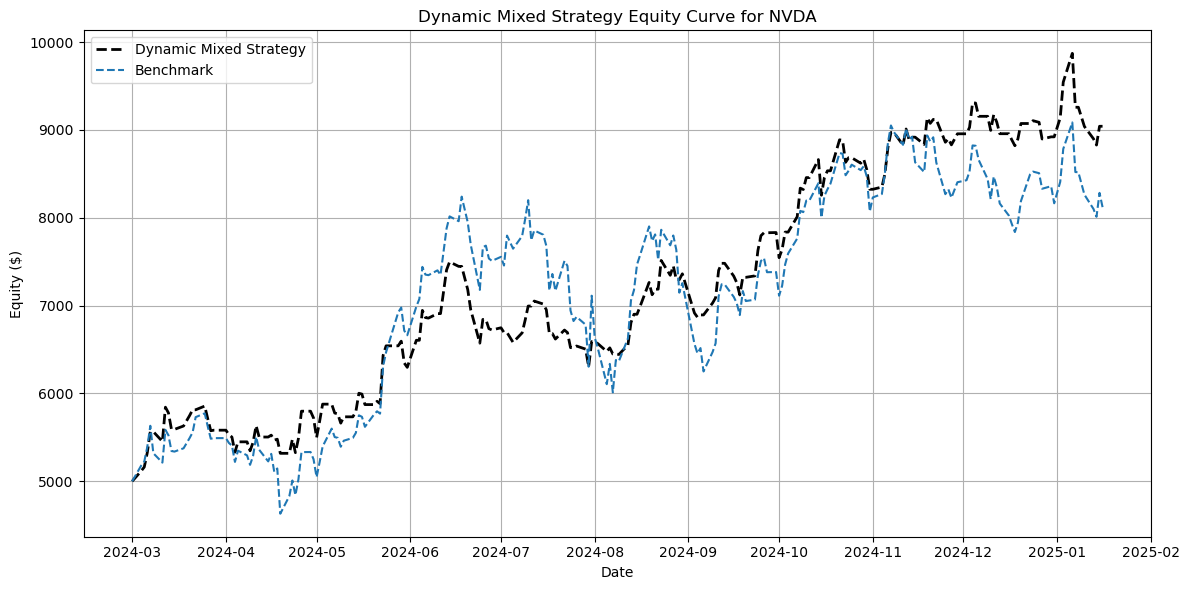

Final Benchmark Strategy return: 1.62
Final Mixed Strategy return: 1.81
NVDA final equity: 9042.17 -> Simple Return: 1.8084


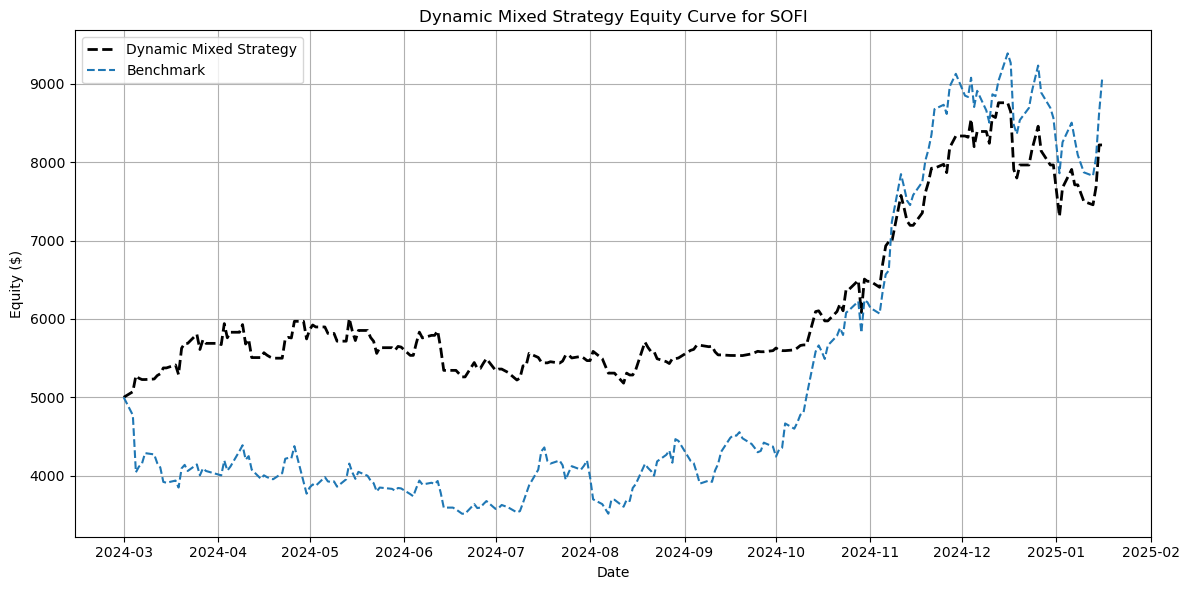

Final Benchmark Strategy return: 1.81
Final Mixed Strategy return: 1.64
SOFI final equity: 8219.41 -> Simple Return: 1.6439


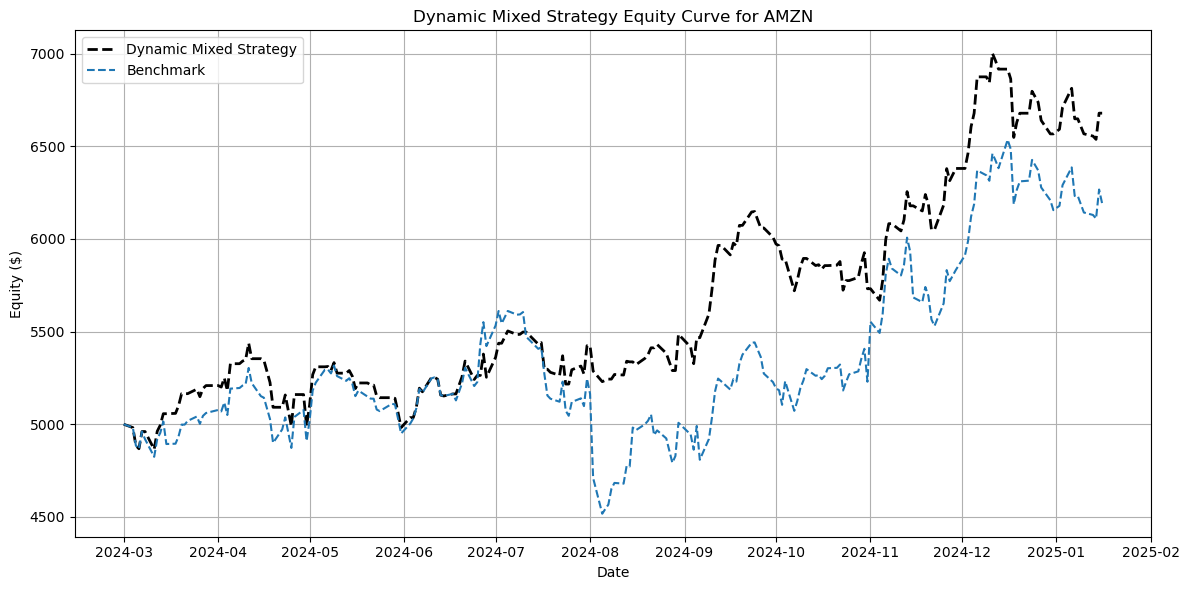

Final Benchmark Strategy return: 1.24
Final Mixed Strategy return: 1.34
AMZN final equity: 6678.20 -> Simple Return: 1.3356


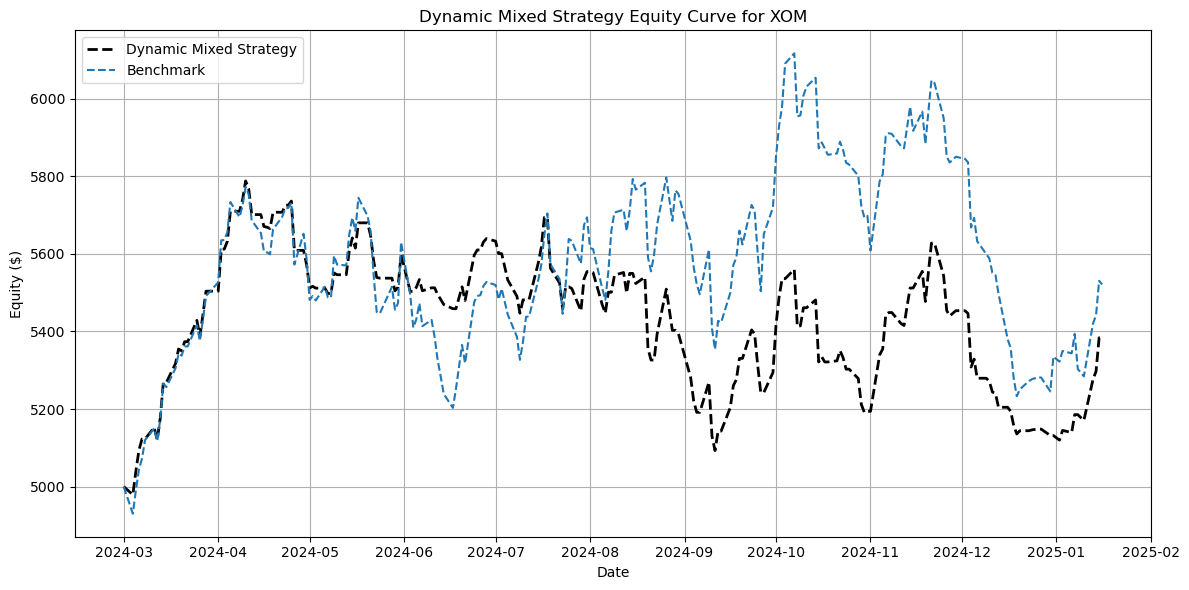

Final Benchmark Strategy return: 1.10
Final Mixed Strategy return: 1.08
XOM final equity: 5383.58 -> Simple Return: 1.0767


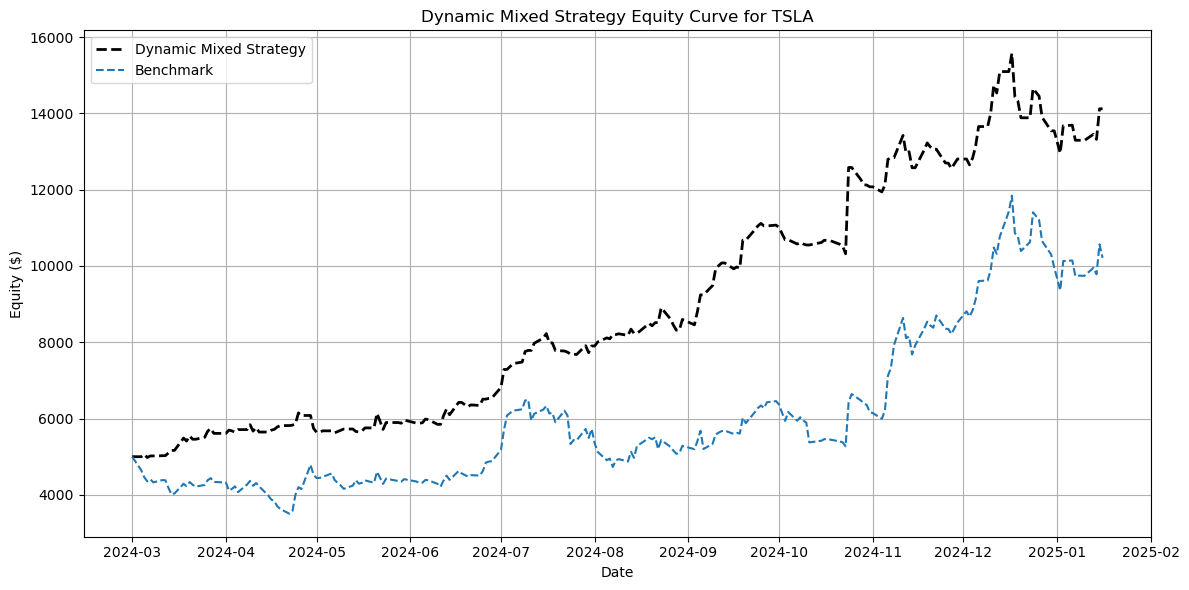

Final Benchmark Strategy return: 2.04
Final Mixed Strategy return: 2.82
TSLA final equity: 14118.69 -> Simple Return: 2.8237


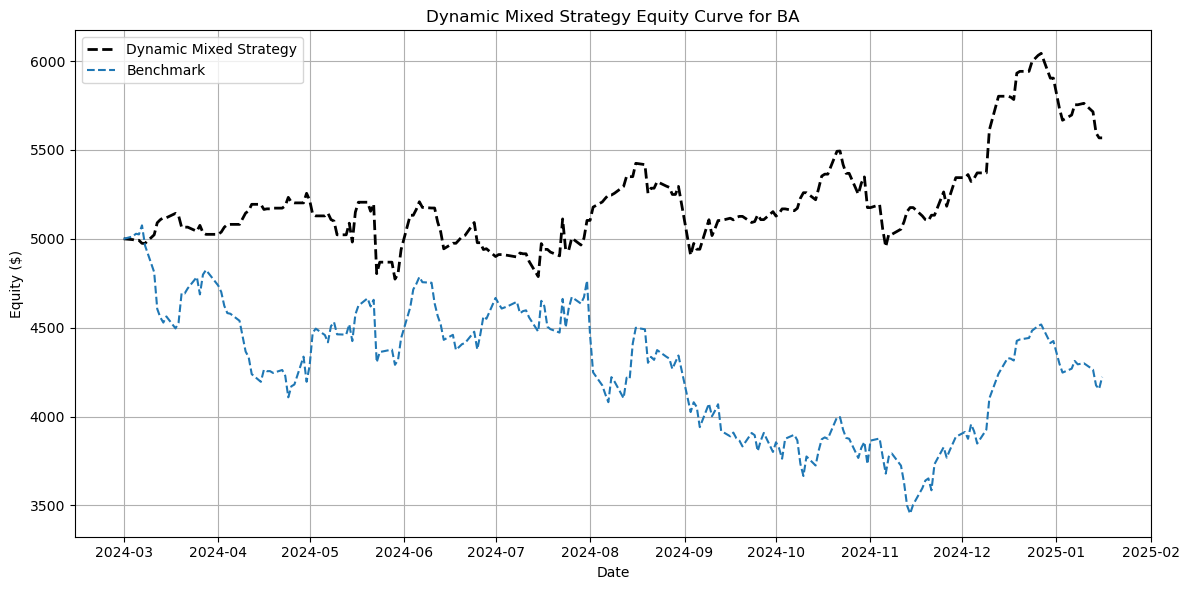

Final Benchmark Strategy return: 0.84
Final Mixed Strategy return: 1.11
BA final equity: 5568.08 -> Simple Return: 1.1136


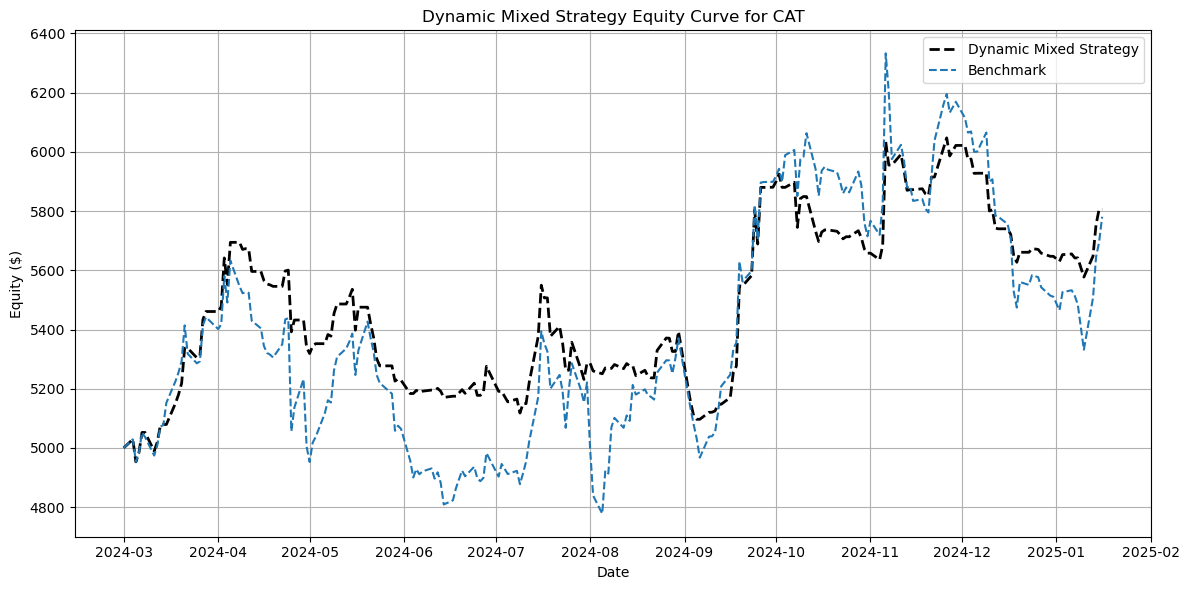

Final Benchmark Strategy return: 1.16
Final Mixed Strategy return: 1.16
CAT final equity: 5805.80 -> Simple Return: 1.1612


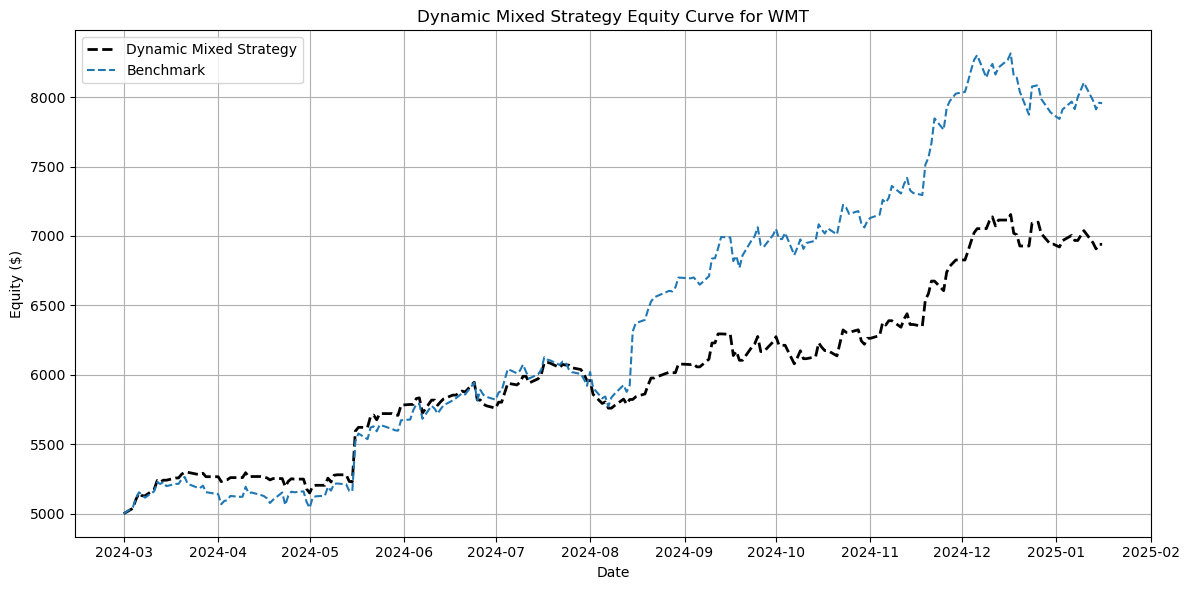

Final Benchmark Strategy return: 1.59
Final Mixed Strategy return: 1.39
WMT final equity: 6940.05 -> Simple Return: 1.3880


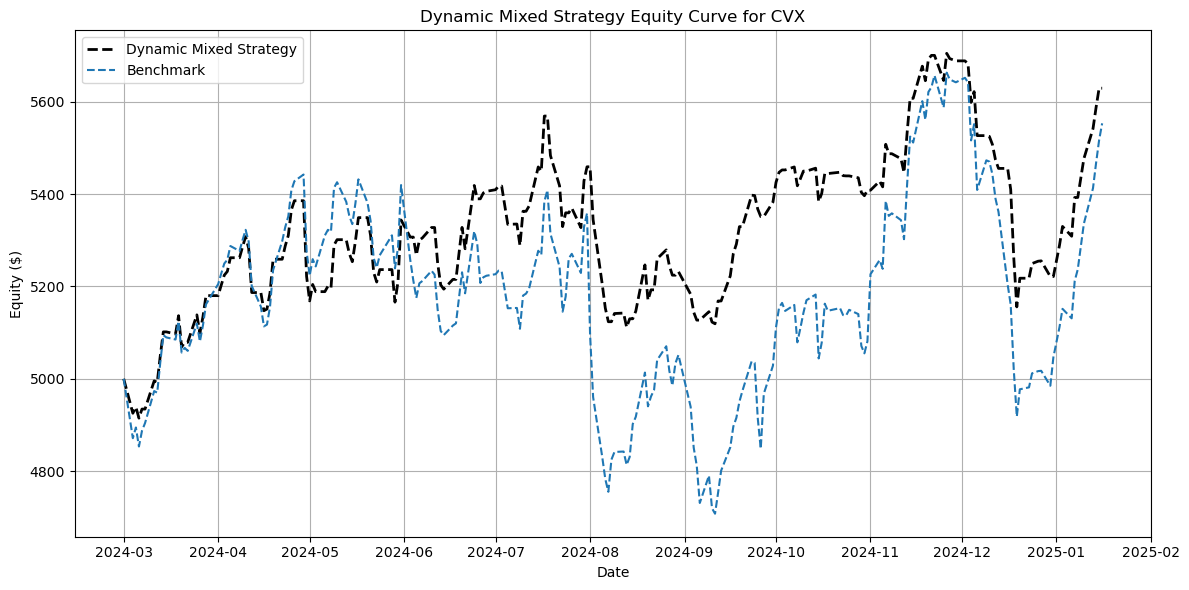

Final Benchmark Strategy return: 1.11
Final Mixed Strategy return: 1.13
CVX final equity: 5629.35 -> Simple Return: 1.1259


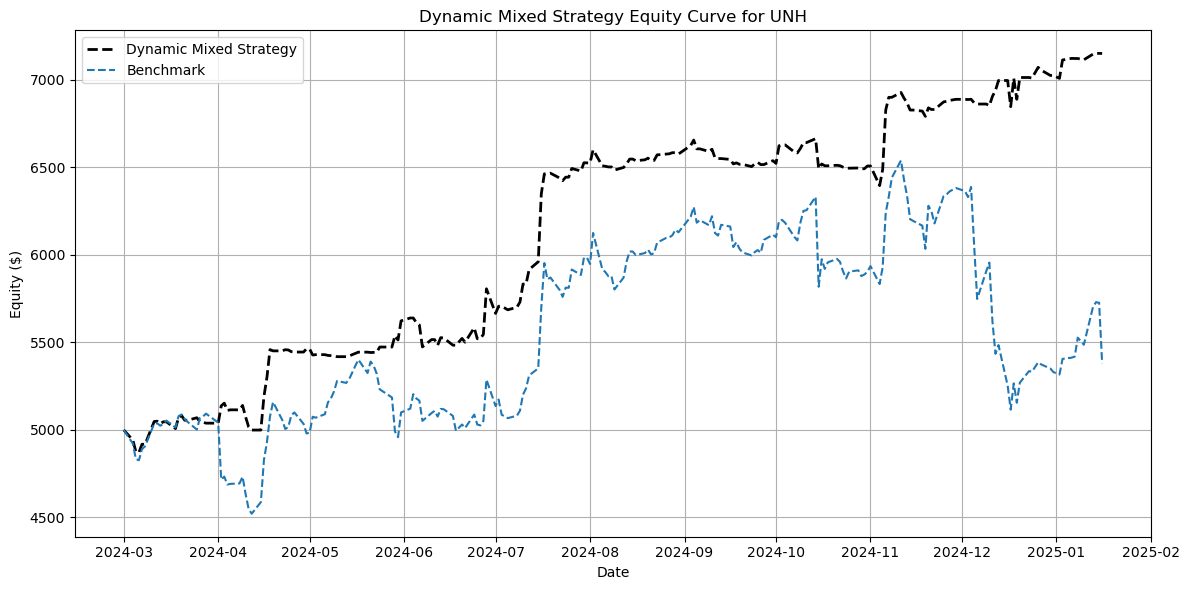

Final Benchmark Strategy return: 1.08
Final Mixed Strategy return: 1.43
UNH final equity: 7149.41 -> Simple Return: 1.4299


{'NVDA': np.float64(1.8084342115174885),
 'SOFI': np.float64(1.6438814949704683),
 'AMZN': np.float64(1.3356405815216523),
 'XOM': np.float64(1.0767161972504098),
 'TSLA': np.float64(2.8237380892030552),
 'BA': np.float64(1.1136169043558517),
 'CAT': np.float64(1.1611609435264985),
 'WMT': np.float64(1.3880090123895543),
 'CVX': np.float64(1.1258702844882098),
 'UNH': np.float64(1.4298812304306503)}

In [16]:
sim_results, portfolio_returns = generate_dynamic_mixed_strategy_portfolio(top10_tickers, train_df, test_df, initial_investment=5000, update_interval=5)
portfolio_returns

In [17]:
allocation_per_stock = 5000
trade_doc = simulate_portfolio_over_period(top10_tickers, sim_results, allocation_per_stock)
portfolio = generate_trade_documentation_table(trade_doc, only_active=False)
equity_cols = [f"{ticker}_Benchmark_Equity" for ticker in top10_tickers]
portfolio["Benchmark_Equity"] = portfolio[equity_cols].sum(axis=1)
portfolio.set_index("Date", inplace=True)
portfolio

,Long,Short,Cash,Total,NVDA_Position,NVDA_Equity,NVDA_Benchmark_Equity,SOFI_Position,SOFI_Equity,SOFI_Benchmark_Equity,...,WMT_Position,WMT_Equity,WMT_Benchmark_Equity,CVX_Position,CVX_Equity,CVX_Benchmark_Equity,UNH_Position,UNH_Equity,UNH_Benchmark_Equity,Benchmark_Equity
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-01,25597.461863,3490.336362,20912.201775,50000.000000,0.667015,5000.000000,5000.000000,-0.333333,5000.000000,5000.000000,...,0.845446,5000.000000,5000.000000,0.571615,5000.000000,5000.000000,0.740028,5000.000000,5000.000000,50000.000000
2024-03-04,31558.217855,5000.000000,13441.782145,50079.261404,1.000000,5118.090142,5179.754218,-0.333333,5071.362352,4771.968934,...,1.000000,5038.787802,5045.949915,0.571615,4925.387741,4871.409583,0.740028,4941.825488,4921.761555,49387.651731
2024-03-05,35048.554217,3333.333333,11618.112450,50282.495428,1.000000,5162.225657,5224.421490,-0.333333,5275.695065,4043.381627,...,1.000000,5101.666124,5108.917612,0.571615,4938.776448,4894.640777,0.740028,4875.281549,4832.696284,48420.641618
2024-03-06,35048.554217,3333.333333,11618.112450,50417.896498,1.000000,5326.525168,5390.700523,-0.333333,5243.500574,4115.684251,...,1.000000,5146.700908,5154.016408,0.571615,4914.879719,4853.412943,0.740028,4871.086355,4827.078833,48617.798497
2024-03-07,35048.554217,3333.333333,11618.112450,50902.184675,1.000000,5564.867333,5631.914297,-0.333333,5226.758771,4154.616229,...,1.000000,5128.857042,5136.147179,0.571615,4934.496104,4887.441915,0.740028,4918.034977,4890.200436,49269.407076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10,35685.913659,0.000000,14314.086341,72532.413478,0.783056,9039.721207,8263.767276,1.000000,7498.685424,7869.855384,...,0.781042,7038.632624,8104.459328,0.826294,5476.623021,5335.832659,0.133933,7113.435266,5486.502314,65858.810418
2025-01-13,38178.619944,0.000000,11821.380056,72637.625127,0.720081,8899.461789,8100.814132,1.000000,7456.290065,7825.361540,...,0.781042,6951.395638,7976.356477,0.826294,5541.747289,5412.835571,0.133933,7145.453885,5701.983769,66289.073991
2025-01-14,40368.527948,0.000000,9631.472052,72658.629244,0.720081,8828.494892,8011.433310,1.000000,7684.165481,8064.516334,...,0.781042,6907.412422,7911.869568,0.826294,5587.347151,5466.841549,0.133933,7149.970954,5729.379671,66334.993581


In [18]:
(portfolio["Cash"] >= 2 * portfolio["Short"]).value_counts()

True    221
Name: count, dtype: int64

In [19]:
return_rate = (portfolio['Total'].iloc[-1] / 50000) - 1
return_rate_pct = f"{return_rate * 100:.2f}%"
return_rate_pct

'49.07%'

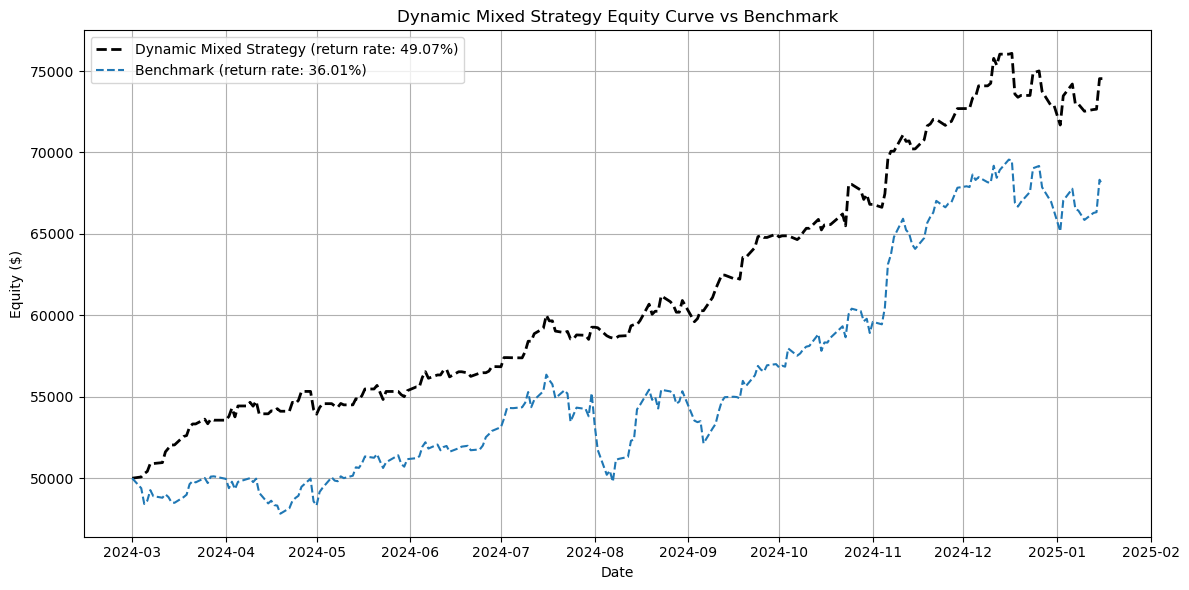

In [20]:
benchmark_return_rate = (portfolio['Benchmark_Equity'].iloc[-1] / 50000) - 1
benchmark_return_rate_pct = f"{benchmark_return_rate * 100:.2f}%"
benchmark_return_rate_pct

plt.figure(figsize=(12,6))
plt.plot(portfolio.index, portfolio["Total"], label=f"Dynamic Mixed Strategy (return rate: {return_rate_pct})", linestyle="--", linewidth=2, color="black")
plt.plot(portfolio.index, portfolio["Benchmark_Equity"], label=f"Benchmark (return rate: {benchmark_return_rate_pct})", linestyle="--")
plt.title(f"Dynamic Mixed Strategy Equity Curve vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Equity ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()